
# ✅ Load and Inspect the Google Form Data in Python



In [1]:


# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step 2: Load the Google Form Excel file
file_path = "Chaithra - thesis (Responses).xlsx"  
df = pd.read_excel(file_path)

# Step 3: Show first 5 rows to verify structure
df.head()




,What is your age group?,What is your current job role?,"How many years of experience do you have working with SQL, Python, or Tableau?",Which industry do you work in?,How frequently do you work with customer churn data?,Which machine learning algorithm do you primarily use for churn prediction? \n,Do you think Customer churn prediction plays a critical role in business decision-making?,Do you believe SQL is an essential tool for data extraction and preprocessing in churn prediction models?,Do you accept that machine learning models in python improve the accuracy of customer churn predictions?,Does Tableau provide effective visualisation for customer churn analysis and reporting?,Do you believe SQL is commonly used to analyze customer behaviour and identify churn patterns?,Do you believe machine learning algorithms such as logistic regression and decision trees are effective for churn prediction?,"Does the integration of SQL, Python, and Tableau enhance the effectiveness of churn prediction models?",Do you accept that feature engineering and data cleaning significantly impact the accuracy of churn prediction models?,Do you think that predicting customer churn contributes to improved customer retention strategies?,Do you believe organisations should allocate more resources to machine learning for churn prediction?,Does the availability and quality of data remain major challenges in developing churn prediction models?,Do you believe automating churn prediction models can help businesses take proactive measures to reduce customer attrition?,"What are the key challenges in implementing customer churn prediction models using SQL, Python or Tableau?",What additional features or improvements could enhance the effectiveness of churn prediction analysis?
0,31-40,Software Engineer,Less than 1 year,Banking/Finance,Monthly,Decision Tree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Data Quality,Automated Reports
1,31-40,Data Analyst,Less than 1 year,E-commerce,Never,Random Forest,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Data Quality,Automated Report
2,31-40,Software Engineer,4-5 years,Telecommunications,Weekly,Random Forest,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Data Quality,Automated Reports
3,41-50,Data Scientist,Less than 1 year,Telecommunications,Monthly,Logistic Regression,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Data Quality,Automated Reports
4,18-30,Data Analyst,Less than 1 year,E-commerce,Monthly,Decision Tree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Data Quality,Real-time Analytics




# ✅ Clean Column Headers (Remove Spaces/Symbols)



In [2]:


# Clean up column names for easier reference
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(' +', ' ', regex=True)
df.columns = df.columns.str.replace('[^0-9a-zA-Z ]', '', regex=True)
df.columns




Index(['What is your age group', 'What is your current job role',
       'How many years of experience do you have working with SQL Python or Tableau',
       'Which industry do you work in',
       'How frequently do you work with customer churn data',
       'Which machine learning algorithm do you primarily use for churn prediction',
       'Do you think Customer churn prediction plays a critical role in business decisionmaking',
       'Do you believe SQL is an essential tool for data extraction and preprocessing in churn prediction models',
       'Do you accept that machine learning models in python improve the accuracy of customer churn predictions',
       'Does Tableau provide effective visualisation for customer churn analysis and reporting',
       'Do you believe SQL is commonly used to analyze customer behaviour and identify churn patterns',
       'Do you believe machine learning algorithms such as logistic regression and decision trees are effective for churn prediction'



# ✅ Descriptive Statistics for Likert Scale Questions



In [5]:




print(df.columns.tolist())






['What is your age group', 'What is your current job role', 'How many years of experience do you have working with SQL Python or Tableau', 'Which industry do you work in', 'How frequently do you work with customer churn data', 'Which machine learning algorithm do you primarily use for churn prediction', 'Do you think Customer churn prediction plays a critical role in business decisionmaking', 'Do you believe SQL is an essential tool for data extraction and preprocessing in churn prediction models', 'Do you accept that machine learning models in python improve the accuracy of customer churn predictions', 'Does Tableau provide effective visualisation for customer churn analysis and reporting', 'Do you believe SQL is commonly used to analyze customer behaviour and identify churn patterns', 'Do you believe machine learning algorithms such as logistic regression and decision trees are effective for churn prediction', 'Does the integration of SQL Python and Tableau enhance the effectiveness 

In [6]:



likert_columns = [
    'Do you think Customer churn prediction plays a critical role in business decisionmaking',
    'Do you believe SQL is an essential tool for data extraction and preprocessing in churn prediction models',
    'Do you accept that machine learning models in python improve the accuracy of customer churn predictions',
    'Does Tableau provide effective visualisation for customer churn analysis and reporting',
    'Do you believe SQL is commonly used to analyze customer behaviour and identify churn patterns',
    'Do you believe machine learning algorithms such as logistic regression and decision trees are effective for churn prediction',
    'Does the integration of SQL Python and Tableau enhance the effectiveness of churn prediction models',
    'Do you accept that feature engineering and data cleaning significantly impact the accuracy of churn prediction models',
    'Do you think that predicting customer churn contributes to improved customer retention strategies',
    'Do you believe organisations should allocate more resources to machine learning for churn prediction',
    'Does the availability and quality of data remain major challenges in developing churn prediction models',
    'Do you believe automating churn prediction models can help businesses take proactive measures to reduce customer attrition'
]

likert_summary = df[likert_columns].describe().T
print(likert_summary)




                                                   count unique  \
Do you think Customer churn prediction plays a ...   151      5   
Do you believe SQL is an essential tool for dat...   151      5   
Do you accept that machine learning models in p...   151      5   
Does Tableau provide effective visualisation fo...   151      5   
Do you believe SQL is commonly used to analyze ...   151      5   
Do you believe machine learning algorithms such...   151      5   
Does the integration of SQL Python and Tableau ...   151      5   
Do you accept that feature engineering and data...   151      5   
Do you think that predicting customer churn con...   151      5   
Do you believe organisations should allocate mo...   151      5   
Does the availability and quality of data remai...   151      5   
Do you believe automating churn prediction mode...   151      5   

                                                               top freq  
Do you think Customer churn prediction plays a ...    

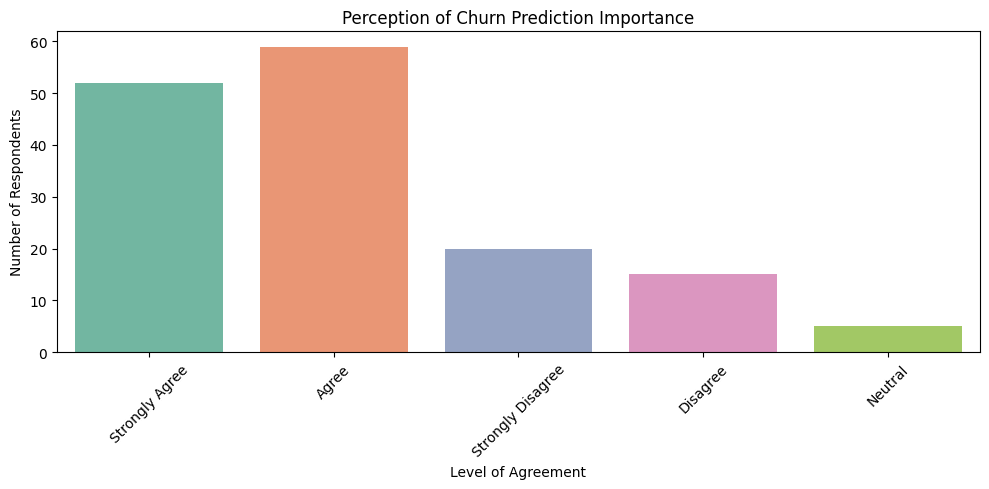

In [9]:


plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Do you think Customer churn prediction plays a critical role in business decisionmaking',
    hue='Do you think Customer churn prediction plays a critical role in business decisionmaking',
    palette='Set2',
    legend=False
)
plt.title('Perception of Churn Prediction Importance')
plt.xlabel('Level of Agreement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






# ✅ Chi-Square Test: Between Job Role and a Categorical Response



In [10]:


from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
chi_table = pd.crosstab(
    df['What is your current job role'],
    df['Do you accept that machine learning models in python improve the accuracy of customer churn predictions']
)

# Step 2: Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(chi_table)

# Step 3: Display results
print("Chi-square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-value:", round(p, 4))

# Step 4: Interpret result
if p < 0.05:
    print("✅ Statistically significant association found between Job Role and Opinion on ML Accuracy.")
else:
    print("❌ No statistically significant association found.")




Chi-square Statistic: 9.8096
Degrees of Freedom: 12
P-value: 0.6327
❌ No statistically significant association found.




# ✅ T-Test / ANOVA: Between Experience and Likert-Scale Score





## ✅ Step 1: Convert Likert responses to numeric scale



In [11]:


likert_map = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

df['ML_Predicts_Churn_Score'] = df[
    'Do you accept that machine learning models in python improve the accuracy of customer churn predictions'
].map(likert_map)






## ✅ Step 2: Run ANOVA (if 3+ experience groups)



In [12]:


from scipy.stats import f_oneway

# Group data by experience category
groups = df.groupby('How many years of experience do you have working with SQL Python or Tableau')['ML_Predicts_Churn_Score'].apply(list)

# Perform ANOVA (F-test)
f_stat, p_val = f_oneway(*groups)

# Output result
print("ANOVA F-Statistic:", round(f_stat, 4))
print("P-value:", round(p_val, 4))

if p_val < 0.05:
    print("✅ Significant difference in belief about ML accuracy across experience groups.")
else:
    print("❌ No significant difference found.")




ANOVA F-Statistic: 0.2773
P-value: 0.8417
❌ No significant difference found.
